# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
cor = app_train.corr()['TARGET']

In [7]:
min15 = cor.sort_values().head(15)
max15 = cor.sort_values().tail(16).head(15)
print('列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個:')
print('最小 15 個:')
print(min15)
print('最大 15 個:')
print(max15)

列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個:
最小 15 個:
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64
最大 15 個:
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_E

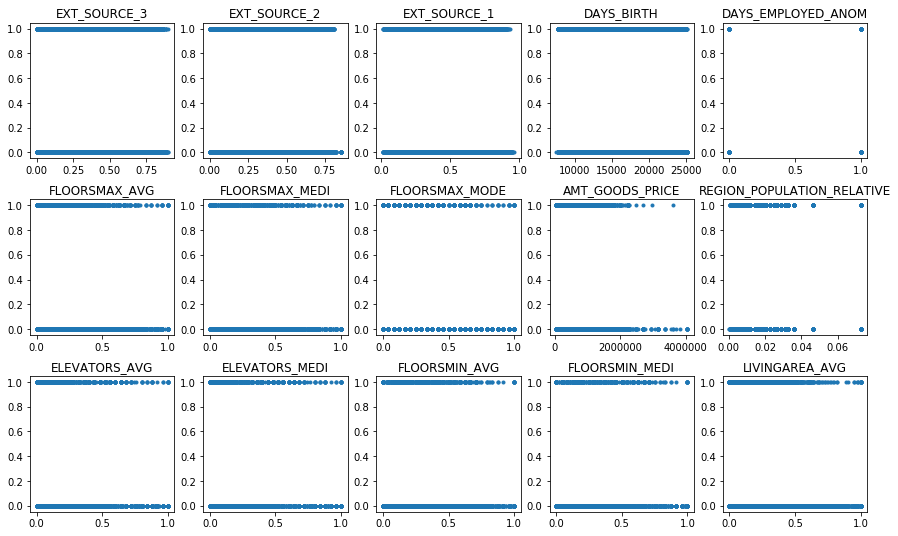

In [8]:
fig, axs = plt.subplots(3, 5)
fig.set_figwidth(15)
fig.set_figheight(9)
fig.subplots_adjust(wspace = 0.2, hspace = 0.3)

count = 0

for i in min15.index:
    sub_df = app_train[app_train[i].notna()]
    p = axs[count//5, count%5]
    p.plot(sub_df[i], sub_df['TARGET'], '.')
    p.set_title(i)
    count = count + 1

plt.show()

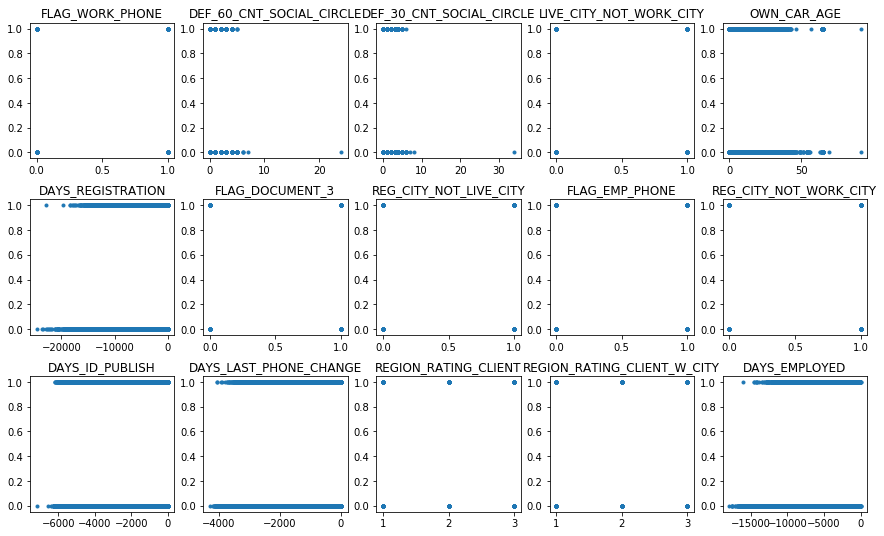

In [9]:
fig, axs = plt.subplots(3, 5)
fig.set_figwidth(15)
fig.set_figheight(9)
fig.subplots_adjust(wspace = 0.2, hspace = 0.3)

count = 0

for i in max15.index:
    sub_df = app_train[app_train[i].notna()]
    p = axs[count//5, count%5]
    p.plot(sub_df[i], sub_df['TARGET'], '.')
    p.set_title(i)
    count = count + 1

plt.show()

發現用散佈圖效果不好，因為值都是 0 和 1，故改用 boxplot

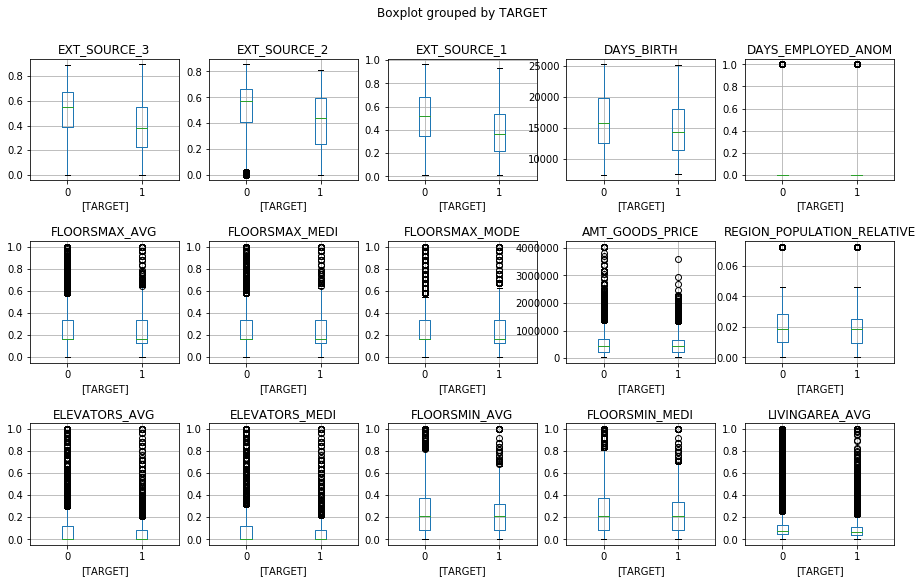

In [10]:
fig, axs = plt.subplots(3, 5)
fig.set_figwidth(15)
fig.set_figheight(9)
fig.subplots_adjust(wspace = 0.2, hspace = 0.5)

count = 0

for i in min15.index:
    p = axs[count//5, count%5]
    p.set_title(i)
    sub_df = app_train[app_train[i].notna()]
    sub_df.boxplot(column=[i], by=['TARGET'], ax=p)
    count = count + 1
    
plt.show()

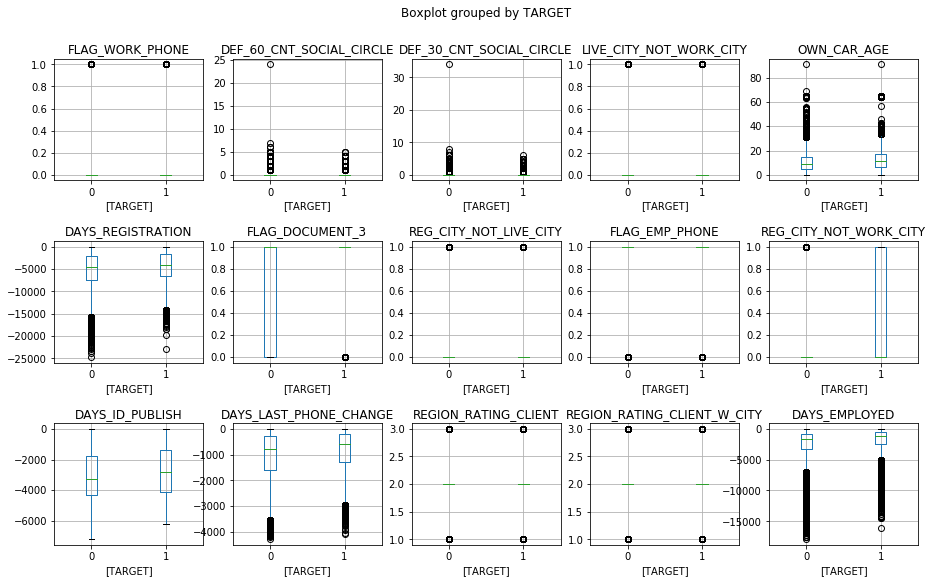

In [11]:
fig, axs = plt.subplots(3, 5)
fig.set_figwidth(15)
fig.set_figheight(9)
fig.subplots_adjust(wspace = 0.2, hspace = 0.5)

count = 0

for i in max15.index:
    p = axs[count//5, count%5]
    p.set_title(i)
    sub_df = app_train[app_train[i].notna()]
    sub_df.boxplot(column=[i], by=['TARGET'], ax=p)
    count = count + 1
    
plt.show()

這 30 欄看起來和 TARGET 無明顯的相關性。

改成找全部相關性最高的欄位: (正相關、負相關)

In [12]:
mycor = app_train.corr()

In [13]:
positive_i = ''
positive_j = ''
positive = 0
negative_i = ''
negative_j = ''
negative = 0
for i in mycor:
    series = mycor[i]
    series_not_i = series[series.index!=i]
    series_positive = series_not_i[series_not_i > 0.5]
    series_negative = series_not_i[series_not_i < -0.5]
    if series_positive.size > 0:
        print(i, '有', series_positive.size, '個欄位相關係數 > 0.5:')
        print(series_positive)
        print('-----------')
        series_positive_max = series_positive.sort_values().tail(1)
        j = series_positive_max[0]
        if j > positive:
            positive = j
            positive_i = i
            positive_j = series_positive_max.index[0]
    if series_negative.size > 0:
        print(i, '有', series_negative.size, '個欄位相關係數 < -0.5:')
        print(series_negative)
        print('-----------')
        series_negative_min = series_negative.sort_values().head(1)
        j = series_negative_min[0]
        if j < negative:
            negative = j
            negative_i = i
            negative_j = series_negative_min.index[0]
print(positive_i,'與',positive_j,'正相關性最高，相關係數',positive)
print(negative_i,'與',negative_j,'負相關性最高，相關係數',negative)

CNT_CHILDREN 有 1 個欄位相關係數 > 0.5:
CNT_FAM_MEMBERS    0.879161
Name: CNT_CHILDREN, dtype: float64
-----------
AMT_CREDIT 有 2 個欄位相關係數 > 0.5:
AMT_ANNUITY        0.770138
AMT_GOODS_PRICE    0.986968
Name: AMT_CREDIT, dtype: float64
-----------
AMT_ANNUITY 有 2 個欄位相關係數 > 0.5:
AMT_CREDIT         0.770138
AMT_GOODS_PRICE    0.775109
Name: AMT_ANNUITY, dtype: float64
-----------
AMT_GOODS_PRICE 有 2 個欄位相關係數 > 0.5:
AMT_CREDIT     0.986968
AMT_ANNUITY    0.775109
Name: AMT_GOODS_PRICE, dtype: float64
-----------
REGION_POPULATION_RELATIVE 有 2 個欄位相關係數 < -0.5:
REGION_RATING_CLIENT          -0.532877
REGION_RATING_CLIENT_W_CITY   -0.531535
Name: REGION_POPULATION_RELATIVE, dtype: float64
-----------
DAYS_BIRTH 有 2 個欄位相關係數 > 0.5:
EXT_SOURCE_1          0.600610
DAYS_EMPLOYED_ANOM    0.619947
Name: DAYS_BIRTH, dtype: float64
-----------
DAYS_BIRTH 有 1 個欄位相關係數 < -0.5:
FLAG_EMP_PHONE   -0.619888
Name: DAYS_BIRTH, dtype: float64
-----------
FLAG_EMP_PHONE 有 3 個欄位相關係數 < -0.5:
DAYS_BIRTH           -0.619888
FL

Name: NONLIVINGAREA_AVG, dtype: float64
-----------
APARTMENTS_MODE 有 26 個欄位相關係數 > 0.5:
APARTMENTS_AVG           0.973259
BASEMENTAREA_AVG         0.666023
COMMONAREA_AVG           0.515926
ELEVATORS_AVG            0.806009
ENTRANCES_AVG            0.612364
FLOORSMAX_AVG            0.585964
LIVINGAPARTMENTS_AVG     0.908278
LIVINGAREA_AVG           0.890721
BASEMENTAREA_MODE        0.678565
COMMONAREA_MODE          0.528205
ELEVATORS_MODE           0.826216
ENTRANCES_MODE           0.615782
FLOORSMAX_MODE           0.595761
LANDAREA_MODE            0.508160
LIVINGAPARTMENTS_MODE    0.937758
LIVINGAREA_MODE          0.910376
APARTMENTS_MEDI          0.977193
BASEMENTAREA_MEDI        0.668783
COMMONAREA_MEDI          0.518884
ELEVATORS_MEDI           0.808858
ENTRANCES_MEDI           0.612536
FLOORSMAX_MEDI           0.585007
LANDAREA_MEDI            0.501440
LIVINGAPARTMENTS_MEDI    0.914521
LIVINGAREA_MEDI          0.894122
TOTALAREA_MODE           0.863628
Name: APARTMENTS_MODE, dtype

Name: ENTRANCES_MEDI, dtype: float64
-----------
FLOORSMAX_MEDI 有 21 個欄位相關係數 > 0.5:
APARTMENTS_AVG           0.616581
YEARS_BUILD_AVG          0.518200
ELEVATORS_AVG            0.677771
FLOORSMAX_AVG            0.997034
FLOORSMIN_AVG            0.739928
LIVINGAPARTMENTS_AVG     0.586424
LIVINGAREA_AVG           0.628571
APARTMENTS_MODE          0.585007
YEARS_BUILD_MODE         0.509241
ELEVATORS_MODE           0.655620
FLOORSMAX_MODE           0.988237
FLOORSMIN_MODE           0.722970
LIVINGAPARTMENTS_MODE    0.565649
LIVINGAREA_MODE          0.596193
APARTMENTS_MEDI          0.614337
YEARS_BUILD_MEDI         0.518315
ELEVATORS_MEDI           0.675787
FLOORSMIN_MEDI           0.740412
LIVINGAPARTMENTS_MEDI    0.586427
LIVINGAREA_MEDI          0.626382
TOTALAREA_MODE           0.629965
Name: FLOORSMAX_MEDI, dtype: float64
-----------
FLOORSMIN_MEDI 有 7 個欄位相關係數 > 0.5:
ELEVATORS_AVG     0.509450
FLOORSMAX_AVG     0.739894
FLOORSMIN_AVG     0.997241
FLOORSMAX_MODE    0.729871
FLOORSMIN_M

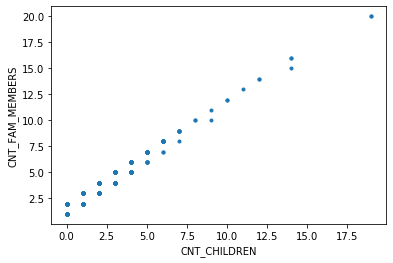

In [14]:
colA = 'CNT_CHILDREN'
colB = 'CNT_FAM_MEMBERS'
sub_df = app_train
plt.plot(sub_df[colA], sub_df[colB], '.')
plt.xlabel(colA)
plt.ylabel(colB)
plt.show()

上圖顯示客戶家庭成員數與客戶小孩數量成正相關